In [32]:
import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv('adult.csv', header=None, na_values=' ?') # header=none (labeling category into numbers), na_value=' ?' if  NAN value represent to ?

In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
df.isnull().sum()

0        0
1     1836
2        0
3        0
4        0
5        0
6     1843
7        0
8        0
9        0
10       0
11       0
12       0
13     583
14       0
dtype: int64

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
si = SimpleImputer(strategy="most_frequent")

In [38]:
df2 = si.fit_transform(df)

In [72]:
df2

array([[39, ' State-gov', 77516, ..., 40, ' United-States', ' <=50K'],
       [50, ' Self-emp-not-inc', 83311, ..., 13, ' United-States',
        ' <=50K'],
       [38, ' Private', 215646, ..., 40, ' United-States', ' <=50K'],
       ...,
       [58, ' Private', 151910, ..., 40, ' United-States', ' <=50K'],
       [22, ' Private', 201490, ..., 20, ' United-States', ' <=50K'],
       [52, ' Self-emp-inc', 287927, ..., 40, ' United-States', ' >50K']],
      dtype=object)

In [73]:
df3 = pd.DataFrame(df2)

In [74]:
df3.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [75]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [84]:
le  = LabelEncoder()
# ohe = OneHotEncoder()
cols  = [1,3,5,6,7,8,9,13,14]

In [90]:
for i in cols:
    df3[i] = le.fit_transform(df3[i])
df3.head()
# encoded_data = pd.get_dummies(df3,cols)
# for i in cols:
#     df3[i] = ohe.fit_transform[df3[i]]
# df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [93]:
target = df3[14]
input = df3.drop(columns=[14])
input.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4


In [94]:
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test = train_test_split(input,target, test_size=0.3, shuffle=True)

In [120]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
6760,41,3,48087,5,4,0,2,1,4,1,0,1590,40,38
21775,61,5,390472,11,9,2,4,0,4,1,0,0,40,38
1214,20,3,205839,15,10,4,7,3,4,1,0,0,16,38
1545,27,3,168107,9,13,2,2,0,4,1,0,0,40,38
830,42,3,257780,1,7,2,9,0,4,1,0,0,15,38


In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
sc = StandardScaler()

In [123]:
sc.fit_transform(x_train)

array([[ 0.1813545 , -0.0833052 , -1.34790537, ...,  3.71711063,
        -0.03108229,  0.26351529],
       [ 1.65078405,  1.74148295,  1.91102674, ..., -0.2170691 ,
        -0.03108229,  0.26351529],
       [-1.36154652, -0.0833052 ,  0.15362962, ..., -0.2170691 ,
        -1.97286625,  0.26351529],
       ...,
       [-0.18600288, -0.0833052 , -0.45953143, ..., -0.2170691 ,
        -0.84015894,  0.26351529],
       [ 1.13648371, -0.0833052 ,  0.85122774, ..., -0.2170691 ,
        -0.03108229,  0.26351529],
       [-0.55336027, -0.0833052 , -0.96847633, ..., -0.2170691 ,
        -0.03108229,  0.26351529]])

In [127]:
import matplotlib.pyplot as plt

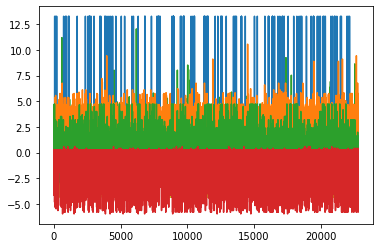

In [129]:
plt.plot(sc.fit_transform(x_train))
plt.show()

In [124]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
mmc = MinMaxScaler()

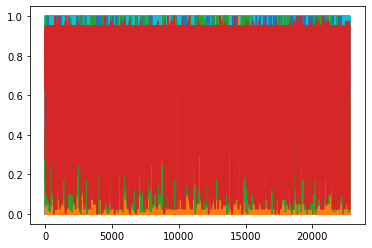

In [130]:
mmc.fit_transform(x_train)
plt.plot(mmc.fit_transform(x_train))
plt.show()

In [112]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA()

In [117]:
pca.n_components('5')

TypeError: 'NoneType' object is not callable